# Multiple Hypothesis Testing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()  # This helps make our plots look nicer

# These make our figures bigger
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.dpi'] = 100

## Multiple testing and the replication crisis

*Coming soon*

### Different approaches to multiple testing

We've seen that when we conduct multiple hypothesis tests at a fixed $p$-value threshold, we can control the FPR of each test, but we don't necessarily control the rate of making errors across multiple tests. In order to address this, we'll define error rates involving all the tests we conduct, and find algorithms that control those error rates. We'll let $m$ be the number of hypothesis tests, and define two error rates:

* The **family-wise error rate (FWER)** is the probability of any one of the $m$ tests resulting in a false positive.
* The **false discovery rate (FDR)** is the expected value of the false discovery proportion (FDP) for the $m$ tests.

We'll explore two algorithms that we can apply to the $p$-values obtained from all $m$ tests: Bonferroni correction, which controls FWER, and the Benjamini-Hochberg procedure, which controls FDR. Here, "controls" means that we're guaranteeing that error rate will be below a certain value we choose. Once we describe the algorithms, we'll discuss the tradeoffs between the two, and how those tradeoffs are related to the inherent properties of the two error rates.

In [ ]:
# NO CODE

# VIDEO: B-H Algorithm Overview and Example
from IPython.display import YouTubeVideo
YouTubeVideo('6BrafO72h_w')

In [ ]:
# NO CODE

# VIDEO: B-H Algorithm Overview and Example
from IPython.display import YouTubeVideo
YouTubeVideo('ILLMDQkQl9A')

## Randomness, FWER, FDR, and FDP

*Coming soon*

In [ ]:
# NO CODE

# VIDEO: B-H Algorithm Overview and Example
from IPython.display import YouTubeVideo
YouTubeVideo('G9EYjVfLLBU')

## Bonferroni correction

Bonferroni correction is very simple: it says that if we want to guarantee that our FWER for $m$ tests will be less than or equal to some value we choose (we'll call it $\alpha$), then we just need to use a $p$-value threshold of $\alpha/m$ to make a decision for each test. For example, if we want to guarantee an FWER of $0.01$ for $500$ tests, we should use a $p$-value threshold for each test of $0.01 / 5000 = 2 \times 10^{-6}$.

Let's show why this formula works. We'll start by establishing some facts and definitions that we need.

To start, we'll need to use the [union bound](https://en.wikipedia.org/wiki/Boole%27s_inequality), which states that for events $A_1, \ldots, A_m$, that 
$$
P\left(\bigcup_{i=1}^m A_i\right) \leq \sum_{i=1}^m P(A_i).
$$ 

Informally, this says that if we add up the independent probabilities of the events occuring, the result will always be greater than or equal to the probability of the union of those events. Intuitively, this is true because when computing the probability of the union, we have to effectively subtract off the overlap between probabilities.

We'll also define the indicator variables $T_1, \ldots, T_m$, where $T_i$ is the event that test $i$ results in a false positive. The family-wise error rate is the probability that any one of the tests is a false positive: in other words,  $FWER = P(T_1 \cup T_2 \cup T_3 \cdots \cup T_m)$. We know from the previous section that if we use the same $p$-value threshold $\gamma$ for each test, then $P(T_i) = \gamma$. 

Putting it all together, we have:

$$
\begin{align*}
FWER 
    &= P\left(\bigcup_{i=1}^m T_i\right) \\
    &\leq \sum_{i=1}^m P\left(T_i\right) \\
    &= m\gamma
\end{align*}
$$

If we choose our $p$-value threshold for each test $\gamma$ to be equal to $\alpha/m$ (recall that $\alpha$ is our desired FWER), then the right-hand side becomes $\alpha$, and we guarantee that our FWER is less than or equal to $\alpha$.

In [ ]:
# NO CODE

# VIDEO: B-H Algorithm Overview and Example
from IPython.display import YouTubeVideo
YouTubeVideo('zwydh-K6Sc4')

## The Benjamini-Hochberg Procedure

The Benjamini-Hochberg (often abbreviated to B-H) procedure is slightly more complicated, but it also uses the same $p$-value threshold for all tests. The key is that we use the $p$-values themselves to determine the threshold. Here's how it works, for a desired FDR $\alpha$:

* First, sort the $p$-values, and index them by $k$ (i.e., the first one corresponds to $k=1$, the second one corresponds to $k=2$, and so on, until the last one corresponds to $k=m$)
* For each sorted $p$-value, compare it to the value $k\alpha/m$ (i.e., the first one gets compared to $\alpha/m$, the second one gets compared to $2\alpha/m$, and so on, until the last one gets compared to $\alpha$)
* Find the largest sorted $p$-value that's still below the comparison value
* Use that $p$-value as the threshold

In [ ]:
# NO CODE

# VIDEO: B-H Algorithm Overview and Example
from IPython.display import YouTubeVideo
YouTubeVideo('w1yZTe7X1JM')

## A Visual Representation of Naive thresholding, Bonferroni, and Benjamini-Hochberg

Consider the $p$-values we looked at in the last section. We'll add a column `k` that provides the index after being sorted:

In [17]:
p_sorted = pd.read_csv('p_values.csv').sort_values('pvalue')

m = len(p_sorted)  # number of tests
k = np.arange(1, m+1)  # index of each test in sorted order

p_sorted['k'] = k 
p_sorted

,pvalue,is_alternative,k
20,0.000008,1,1
43,0.000109,0,2
56,0.000162,1,3
82,0.000219,1,4
1,0.000436,1,5
...,...,...,...
19,0.952674,0,96
49,0.978843,0,97
13,0.980498,0,98
42,0.982076,0,99


We can visualize the $p$-values in sorted order:

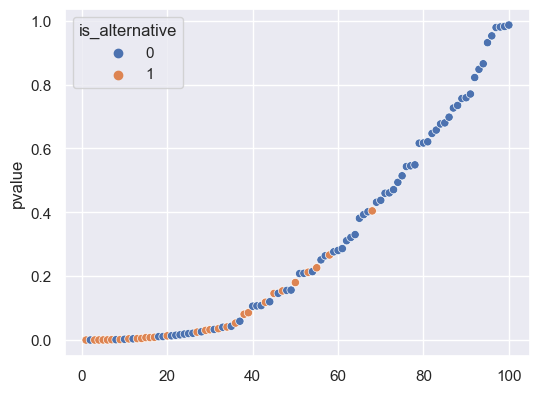

In [6]:
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative']);

Here, the $x$-axis is $k$, the index, and the $y$-axis represents the $p$-value. We can visualize the results of two techniques:

* If we use a naive $p$-value threshold of 0.05 for all tests, we will obtain an FPR of 0.05. This threshold is the black line below.
* If we use Bonferroni correction and want a FWER of 0.05 (i.e., the probability of making any false positives at all is 0.05), then we should use a $p$-value threshold of $\frac{0.05}{100} = 0.0005$. This threshold is the red line below:

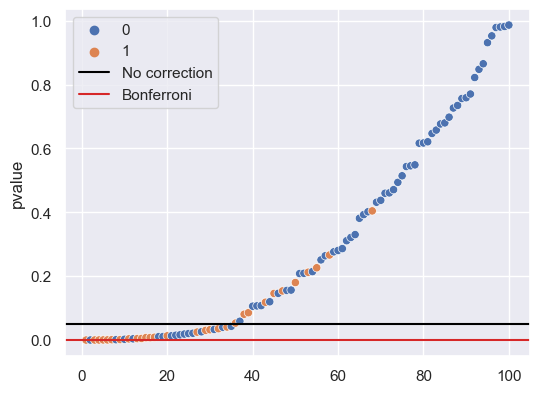

In [10]:
desired_fwer = 0.05
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative'])
plt.axhline(0.05, label='No correction', color='black')
plt.axhline(desired_fwer / m, label='Bonferroni', color='tab:red')

plt.legend();

In this visualization, how does the Benjamini-Hochberg procedure work? We compare each $p$-value to the comparison value $k\alpha/m$, which in this visualization is a line. In order to better see what's going on, we'll also zoom in on a narrower range of $p$-values:

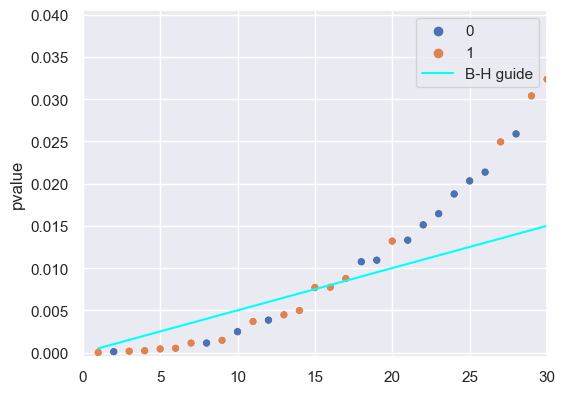

In [16]:
desired_fdr = 0.05
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative'])
plt.plot(k, k/m * desired_fdr, label='B-H guide', color='cyan')
plt.axis([-0.05, 30, -0.0005, 0.0405])
plt.legend();

The Bonferroni procedure says to take the largest $p$-value that's below the comparison value: in this case, that's the point at index 16. This becomes our $p$-value threshold, so we choose to reject the null hypothesis for the first 16 $p$-values (after being sorted).

### Why does Benjamini-Hochberg Control FDR?

*Coming soon*

In [18]:
# NO CODE

# VIDEO: B-H Proof Sketch
from IPython.display import YouTubeVideo
YouTubeVideo('e10W3lJsBhc')

## Comparing and Contrasting FWER and FDR

*Coming soon*

In [18]:
# NO CODE

# VIDEO: B-H Proof Sketch
from IPython.display import YouTubeVideo
YouTubeVideo('hD6zX8zZU_A')